<a href="https://colab.research.google.com/github/marcus2348532/2348532_Ex-2/blob/main/exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/Iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
d={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
df["Species"]=df["Species"].map(d)
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

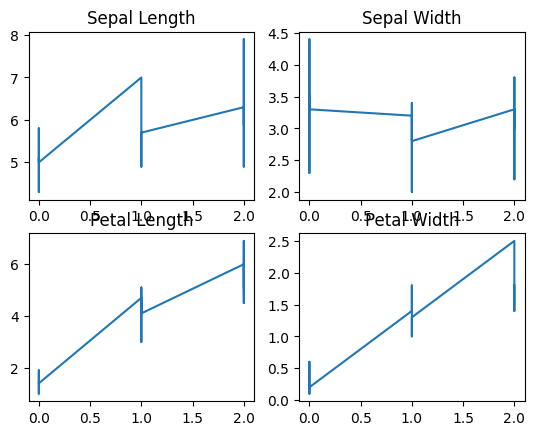

In [11]:
import matplotlib.pyplot as plt
figure,axis=plt.subplots(2,2)
axis[0,0].plot(df["Species"],df["SepalLengthCm"])
axis[0,0].set_title("Sepal Length")
axis[0,1].plot(df["Species"],df["SepalWidthCm"])
axis[0,1].set_title("Sepal Width")
axis[1,0].plot(df["Species"],df["PetalLengthCm"])
axis[1,0].set_title("Petal Length")
axis[1,1].plot(df["Species"],df["PetalWidthCm"])
axis[1,1].set_title("Petal Width")
plt.show()

In [12]:
y=df["Species"]
df.drop("Species",axis=1,inplace=True)
x=df

In [13]:
from numpy import size
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred=knn.predict(x_test)

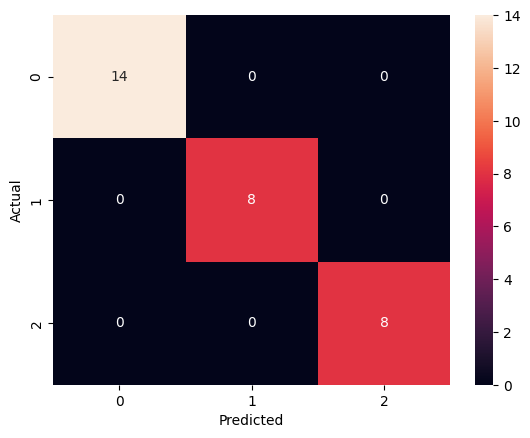

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print(acc)

1.0


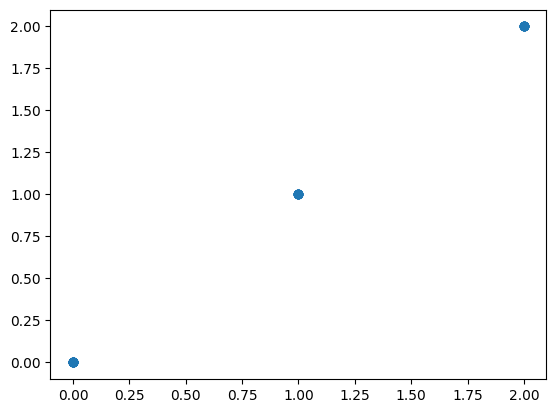

In [18]:
plt.scatter(y_test,y_pred)